<a href="https://colab.research.google.com/github/Goldi-Ai/PRODIGY_DS_04/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [8]:

# Load Dataset
df = pd.read_csv("dataset/twitter_training.csv")

print("✅ Dataset Loaded Successfully")
print("Dataset Shape:", df.shape)
print("\nSample Data:\n", df.head())

✅ Dataset Loaded Successfully
Dataset Shape: (74681, 4)

Sample Data:
    2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [9]:
# Rename columns
df.columns = ["ID", "Entity", "Sentiment", "Tweet"]

In [10]:
# Drop NA values if any
df.dropna(inplace=True)

/tmp/ipython-input-1612346628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="Set2")


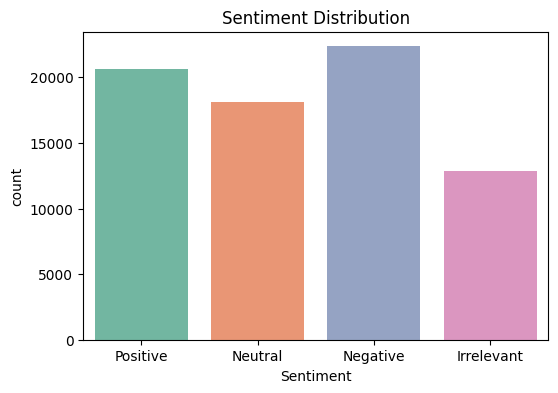

In [11]:
# Sentiment Distribution Visualization
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

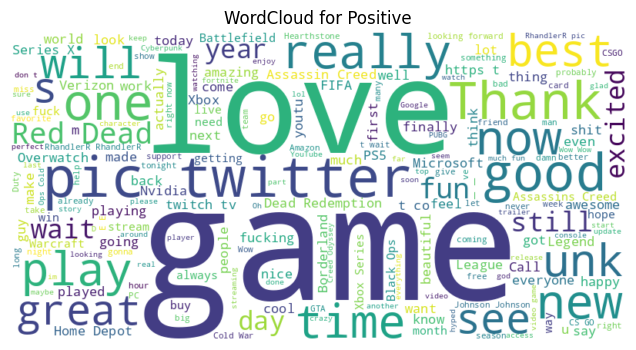

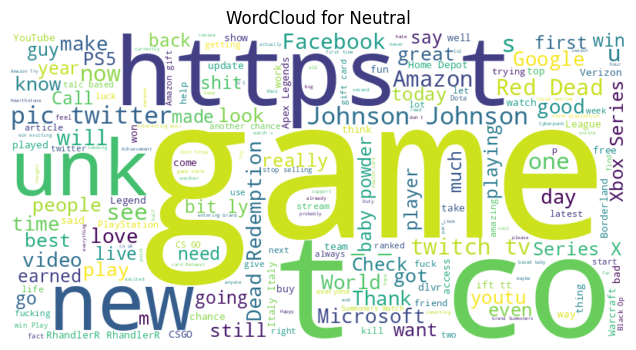

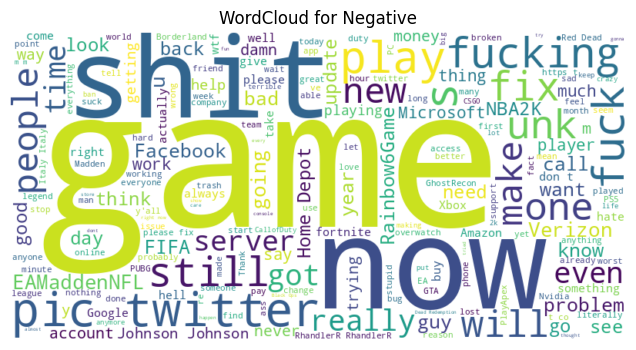

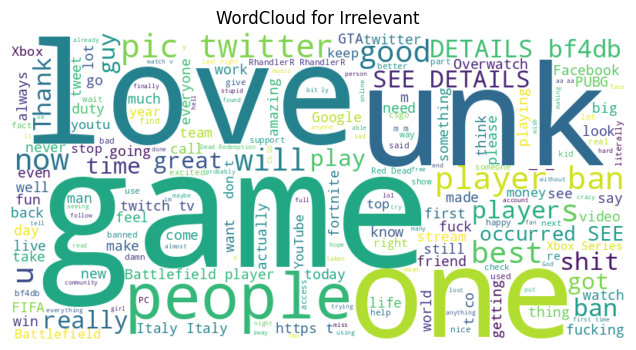

In [12]:
# WordCloud for each Sentiment
for sentiment in df["Sentiment"].unique():
    text = " ".join(df[df["Sentiment"]==sentiment]["Tweet"].astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment}")
    plt.show()

In [13]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["Tweet"].astype(str))
y = df["Sentiment"]

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, average="weighted")

print("\n✅ Naive Bayes Evaluation")
print("Accuracy:", nb_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


✅ Naive Bayes Evaluation
Accuracy: 0.6488951956213258

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.75      0.37      0.49      2624
    Negative       0.63      0.80      0.71      4463
     Neutral       0.67      0.56      0.61      3589
    Positive       0.63      0.74      0.68      4123

    accuracy                           0.65     14799
   macro avg       0.67      0.62      0.62     14799
weighted avg       0.66      0.65      0.64     14799



In [16]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average="weighted")

print("\n✅ Logistic Regression Evaluation")
print("Accuracy:", lr_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


✅ Logistic Regression Evaluation
Accuracy: 0.6993040070275018

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.70      0.54      0.61      2624
    Negative       0.74      0.78      0.76      4463
     Neutral       0.70      0.64      0.67      3589
    Positive       0.66      0.77      0.71      4123

    accuracy                           0.70     14799
   macro avg       0.70      0.68      0.69     14799
weighted avg       0.70      0.70      0.70     14799



In [17]:
# 📊 Model Comparison
comparison_df = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [nb_acc, lr_acc],
    "F1-Score": [nb_f1, lr_f1]
})

print("\n📊 Model Performance Comparison:\n", comparison_df)


📊 Model Performance Comparison:
                  Model  Accuracy  F1-Score
0          Naive Bayes  0.648895  0.637911
1  Logistic Regression  0.699304  0.696482


/tmp/ipython-input-3192636568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="Set2")


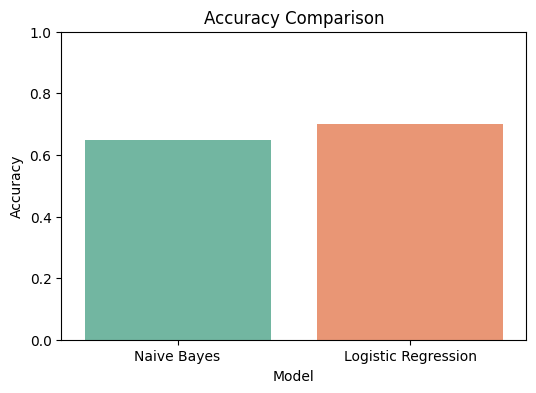

In [18]:
# Plot Accuracy Comparison
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="Set2")
plt.title("Accuracy Comparison")
plt.ylim(0,1)
plt.show()

/tmp/ipython-input-1739622974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=comparison_df, palette="Set3")


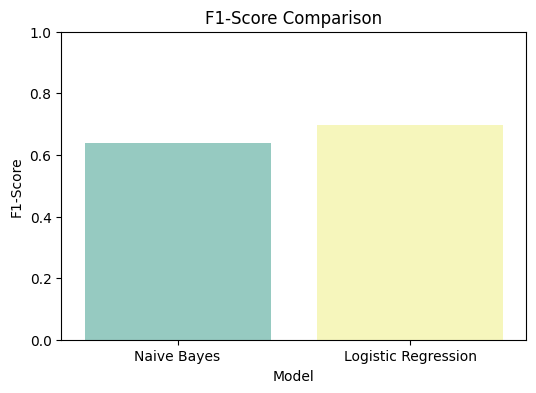

In [19]:
# Plot F1-Score Comparison
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="F1-Score", data=comparison_df, palette="Set3")
plt.title("F1-Score Comparison")
plt.ylim(0,1)
plt.show()

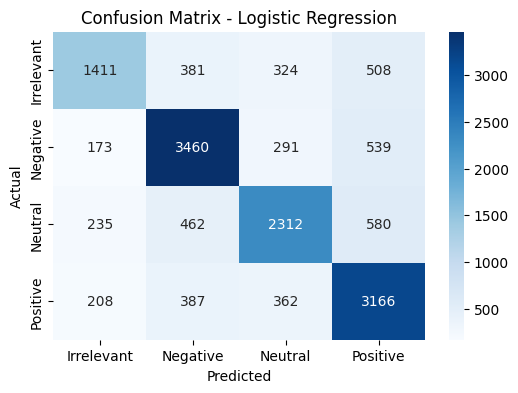

In [20]:

# 📌 Confusion Matrix (Logistic Regression as better model usually)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues",
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()